<a href="https://colab.research.google.com/github/shashi3876/data-wrangling/blob/main/Analyze_Fido_Winners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

[Fido](https://en.wikipedia.org/wiki/Fido_(wireless_carrier)) is a Canadian wireless service provider owned by Rogers Communications. They provide mobile services as well as home internet services. They provide various perks for their customers through their [Fido XTRA](https://www.fido.ca/support/mobility/xtra-faqs) program. These perks include sepcial discount codes, coupons and codes for free stuff, and prizes distributed via contests. Although all the contests are daily entry contests depending on the way the prizes are awarded, there are two types of contests. 

1.   Instant win contests : The winner of the instant win contests will be notified immediately after the entry is received. Although the contestant have to play a game (scratch an area, reveal a door), the win or loss is decided at the point of entry. The prizes will be distributed randomely at various times and the first person who plays after that time will be declared the winner.
2.   General draw contests : In these contests the winners will be chosen at a later date from all the eligible entries.



# Problem Statement

The objective of this notebook is to look at the data of winners of Fido XTRA prizes that is available and analyze it. This will help to check whether the published results are infact correct. Also will check whether the prize distribution matches with thier customer ditribution.

#Data Scraping

In this section scrapy is used to collect data from the website.

##Setting up Scrapy



Installing scrapy

In [1]:
!pip install scrapy
!pip install crochet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 271 kB 5.3 MB/s 
     |████████████████████████████████| 93 kB 2.5 MB/s 
     |████████████████████████████████| 4.1 MB 35.0 MB/s 
     |████████████████████████████████| 57 kB 5.2 MB/s 
     |████████████████████████████████| 254 kB 68.4 MB/s 
     |████████████████████████████████| 3.1 MB 36.1 MB/s 
     |████████████████████████████████| 74 kB 3.2 MB/s 
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.6-py3-none-any.whl size=11959 sha256=a4d3f801b43199f95f597674c8163b15eebc092037bf0ee704758c282ba03a41
  Stored in directory: /root/.cache/pip/wheels/c9/d6/6a/de198d890277cde60ca3dbebe7ae592d3b381c7d9bb2455f4d
Successfully built PyDispatcher
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import scrapy
from scrapy.crawler import CrawlerProcess,CrawlerRunner
from crochet import setup, wait_for
setup()

In [3]:
class FidoWinnerSpider(scrapy.Spider):
    name = "fidowinners"
    start_urls = [
        'https://forums.fido.ca/t5/Apps/Fido-XTRA-contest-winners-2022-Part-2/ta-p/192761','https://forums.fido.ca/t5/Apps/Fido-XTRA-contest-winners-2022/ta-p/155521'
    ]
    custom_settings = {'FEEDS': {'winners.csv': {'format': 'csv','overwrite': True}}}
    def parse(self, response):
      for row in response.xpath('//tr'):
        yield {
            'first':row.xpath('td//text()')[0].extract(),
            'last': row.xpath('td//text()')[1].extract(),
            'city': row.xpath('td//text()')[2].extract(),
            'province': row.xpath('td//text()')[3].extract(),
            'prize': row.xpath('td//text()')[4].extract(),                       
        }
    '''def parse(self, response):
      for quote in response.xpath('//table'):
        yield {'quote': quote.extract()}'''
       

In [4]:
@wait_for(10)
def run_spider():
    crawler = CrawlerRunner()
    d = crawler.crawl(FidoWinnerSpider)
    return d

In [ ]:
run_spider()

#Data Analysis

In this section, pandas data frames are used to analyze the gathered data.

In [39]:
import numpy as np
import pandas as pd

winners=pd.read_csv('winners.csv')
winners.head(20)

,first,last,city,province,prize
0,First Name,Last name,City,Province,Prize
1,Jason,A.,Surrey,British Columbia,A one-time credit representing one year of Fid...
2,Anne,B.,Levis,Quebec,A one-time credit representing one year of Fid...
3,Quang,D.,Scarborough,Ontario,A one-time credit representing one year of Fid...
4,Sabrina,F.,Brampton,Ontario,A one-time credit representing one year of Fid...
5,Naimia,I.,Maple,Ontario,A one-time credit representing one year of Fid...
6,Xizhe,J.,Oakville,Ontario,A one-time credit representing one year of Fid...
7,Farbod,M.,Toronto,Ontario,A one-time credit representing one year of Fid...
8,Angelo,P.,Toronto,Ontario,A one-time credit representing one year of Fid...
9,Yamin,R.,Guelph,Ontario,A one-time credit representing one year of Fid...


As evident form the above data farme, we have incorrectly read the first row of each table as an entry (ie. The First Name, Last Name, ... row). Now lets get rid of these entries.

In [40]:
winners=winners[winners['first']!='First Name']

Let's see how many unique prizes were there.

In [41]:
print(winners['prize'].unique())

['A one-time credit representing one year of Fido service'
 'One (1) Sobeys gift card of $5' 'One (1) Agora Nuts vouchers of $100'
 'One (1) wrap valued at $8.50.'
 'One (1) cheesecake slice valued at $8.50.'
 'One (1) regular sized regular latte valued at $4.95.'
 'One (1) $25 WINNERS Gift Card' 'One (1) $50 Doordash Voucher'
 'One (1) Bundle including a K-Slim Coffee Maker, a travel mug and 24 Van Houtte Original House Blend coffee pods'
 'One (1) $100 Indigo gift card' 'One (1) $300 PKG voucher'
 'One (1) Samsung Galaxy S20 FE 5G phone' 'One (1) L’amour is love pin'
 'One (1) pair of Tie-Dye socks' 'One (1) Decathlon eGift Card of $200'
 'One (1) Walmart eGift card of $500'
 'One (1) 24-unit case of GURU Organic Energy—Varied Flavours'
 'A one-time credit representing one year of Fido service\xa0\xa0'
 'One (1) TCL 30 5G device and one (1) TCL 4-Series 43″ 4K UHD HDR LED Smart Google TV.'
 'One (1) TCL 30 5G device\xa0'
 'One (1) FOUR FATHERS FOOD CO. hot sauce starter pack.'
 'One 

That's a pretty impressive list of prizes. Next we'll find the unique winners and what they have won using a groupby statement. Here we assume that same city does not appear in different provinces (ie. First name, last name, and the city uniquely identifies a person)

In [67]:
winner_list=winners.groupby(['first','last','city']).agg({'province':'count','prize':lambda x: ','.join(x)}).sort_values(by='province',ascending=False)
winner_list.rename(columns={'province':'Num prizes'},inplace=True)
print(winner_list)

                             Num prizes  \
first        last city                    
Lynne        R.   Surrey             20   
Victor       B.   Calgary            20   
Chiung-Hui   H.   Richmond           18   
Albert       C.   Burnaby            18   
Aly          K.   Edmonton           17   
...                                 ...   
Imam Shareef S.   Surrey              1   
Iman         B.   Ottawa              1   
             F.   Edmonton            1   
             N.   Markham             1   
Étienne      A.   Montréal            1   

                                                                         prize  
first        last city                                                          
Lynne        R.   Surrey     One (1) wrap valued at $8.50.,One (1) wrap val...  
Victor       B.   Calgary    One (1) wrap valued at $8.50.,One (1) wrap val...  
Chiung-Hui   H.   Richmond   One (1) wrap valued at $8.50.,One (1) cheeseca...  
Albert       C.   Burnaby    One (1

It's impresiive that some people have won 20 prizess. Lets see the prizes won by the winners with the highest wins. Since some prizes seems to be duplicates, we'll use a Counter object to store them.

In [68]:
from collections import Counter
winner_list.reset_index(inplace=True)
for i in range(10):
  temp=winner_list.iloc[i]['prize'].split(',')
  name=winner_list.iloc[i]['first']+" "+winner_list.iloc[i]['last']
  number_prizes=winner_list.iloc[i]['Num prizes']
  print(f'{name} has won {number_prizes} prizes')
  print(Counter(temp))

Lynne  R. has won 20 prizes
Counter({'One (1) regular sized regular latte valued at $4.95.': 10, 'One (1) wrap valued at $8.50.': 5, 'One (1) cheesecake slice valued at $8.50.': 5})
Victor B. has won 20 prizes
Counter({'One (1) cheesecake slice valued at $8.50.': 8, 'One (1) regular sized regular latte valued at $4.95.': 8, 'One (1) wrap valued at $8.50.': 4})
Chiung-Hui H. has won 18 prizes
Counter({'One (1) cheesecake slice valued at $8.50.': 11, 'One (1) regular sized regular latte valued at $4.95.': 6, 'One (1) wrap valued at $8.50.': 1})
Albert C. has won 18 prizes
Counter({'One (1) regular sized regular latte valued at $4.95.': 8, 'One (1) wrap valued at $8.50.': 5, 'One (1) cheesecake slice valued at $8.50.': 5})
Aly K. has won 17 prizes
Counter({'One (1) cheesecake slice valued at $8.50.': 7, 'One (1) wrap valued at $8.50.': 5, 'One (1) regular sized regular latte valued at $4.95.': 3, 'One (1) Sobeys gift card of $5': 1, 'One (1) Sonos One speaker': 1})
Vivian C. has won 17 pr

It seems like most people have won the cheese cake prize and the latte prize through Fido contests. I'm kind of bummed that I did not win that prize at all. 


## Geographical distribution of prizes

Lets see the prize distributon among provinces.

                           Num prizes
province                             
British Columbia                 9188
Ontario                          5237
Alberta                          3457
Quebec                           2650
Manitoba                          192
Nova Scotia                       163
New Brunswick                     128
Saskatchewan                       34
Newfoundland and Labrador           6
Prince Edward Island                6
Nunavut                             1


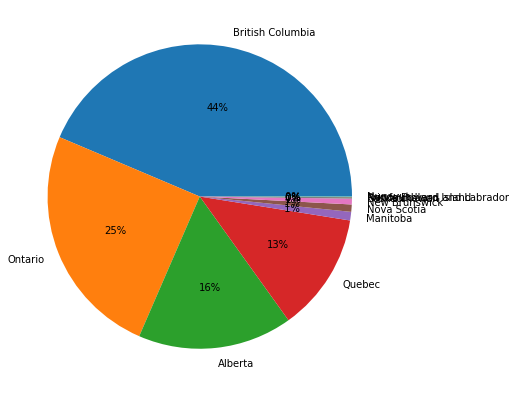

In [91]:
from matplotlib import pyplot as plt

winner_list_province=winners.groupby(['province']).agg({'first':'count'}).sort_values(by='first',ascending=False)
winner_list_province.rename(columns={'first':'Num prizes'},inplace=True)
#winner_list_province.reset_index(inplace=True)
print(winner_list_province)

fig = plt.figure(figsize =(10, 7));
plt.pie(winner_list_province['Num prizes'],autopct='%2.0f%%',labels=winner_list_province.index);

Fido winners are mainly in the province of British Columbia. This prize distribution is totally different than the [population distribution of Canada](https://en.wikipedia.org/wiki/Population_of_Canada_by_province_and_territory)  where around 38% of people live in Ontario while only 14% of people live in British Columbia. Probably the customer distribution of Fido is skewed towards western provinces. I tried finding a customer distribution list for Fido but was unsuccesful.

In [102]:
winner_list_city=winners.groupby(['city']).agg({'first':'count'}).sort_values(by='first',ascending=False)
winner_list_city.rename(columns={'first':'Num prizes'},inplace=True)
winner_list_city.reset_index(inplace=True)
print(winner_list_city.head(10))

         city  Num prizes
0     Calgary        1442
1     Burnaby        1233
2  Vancouver         1189
3   Vancouver        1129
4      Surrey         991
5    Edmonton         711
6     Surrey          593
7    Richmond         522
8   Edmonton          503
9   Richmond          450


Calgary has the highest number of winners (I'm not talking about your Hockey team Calgary!). However, when looking carefully at the above ten cities, it is clear that some names have been duplicated due to changes in spaces etc. Edmonton appears twice and Vancouver appears twice as well. Thus, the data given by the city field not exacty correct and definitely, Vancouver has the highest number of winners. 

## Analysing some of the names

Lets look at the longest names and chekc if there are any odd values.

In [99]:
winners.sort_values(by=['first'], key=lambda x:x.str.len(),inplace=True,ascending=False)
winners.head(20)

,first,last,city,province,prize
4763,bhupinder. ...,D.,Vancouver,British Columbia,One (1) cheesecake slice valued at $8.50.
5299,Charitha gayathri kumarihami,R.,Waterloo,Ontario,One (1) Sobeys gift card of $5
1831,Hélcio Tadeu da Silva filho,F.,Moncton,New Brunswick,One (1) Sobeys gift card of $5
18323,Christopher Anthony Ernani,V.,Coquitlam,British Columbia,One (1) cheesecake slice valued at $8.50.
12403,Vijai Rani Gulshan Manak,M.,Victoria,British Columbia,One (1) cheesecake slice valued at $8.50.
4410,Margaret So Kam Margaret,C.,Burnaby,British Columbia,One (1) regular sized regular latte valued at ...
3600,Coralfauchon@hotmail.com,C.,Surrey,British Columbia,One (1) cheesecake slice valued at $8.50.
15966,Harshavardhana Brij Bala,S.,Burnaby,British Columbia,One (1) cheesecake slice valued at $8.50.
4935,Zenilkumar Himanshubhai,P.,Calgary,Alberta,One (1) Sobeys gift card of $5
4689,Mohammad Hasan Muntakim,N.,Kamloops,British Columbia,One (1) Sobeys gift card of $5


Some people have used an email address as the first name. Also the name in the first row is definitely a typo as there are lot of white spaces in between two names. Also there seem to be lot of ethnic names (as expected) in this set of longest names.
Lets see the most common first name in this data set.

In [104]:
winner_list_first=winners.groupby(['first']).agg({'city':'count'}).sort_values(by='city',ascending=False)
winner_list_first.rename(columns={'city':'Num prizes'},inplace=True)
winner_list_first.reset_index(inplace=True)
print(winner_list_first.head(10))

      first  Num prizes
0     David         112
1   Michael          94
2      John          87
3  Michael           73
4   Jessica          65
5     Kevin          63
6      Eric          60
7      Ryan          59
8     Peter          59
9    Daniel          56


As expected we have lot of Davids, Michaels, and Johns.

## Analysis of bigger prize winners

Now lets cherrypick some of the better prizes from the initial list of prizes and look at their winners. Here, I choose the prizes that have an approximate value over $200. I use an educated geuss on the value of the prize when it is not explictly stated in the prize name.

In [106]:
big_prizes=['A one-time credit representing one year of Fido service', 
 'One (1) Bundle including a K-Slim Coffee Maker, a travel mug and 24 Van Houtte Original House Blend coffee pods','One (1) $300 PKG voucher'
 'One (1) Samsung Galaxy S20 FE 5G phone','One (1) Decathlon eGift Card of $200'
 'One (1) Walmart eGift card of $500', 'A one-time credit representing one year of Fido service\xa0\xa0',
 'One (1) TCL 30 5G device and one (1) TCL 4-Series 43″ 4K UHD HDR LED Smart Google TV.'
 'One (1) TCL 30 5G device\xa0',
 'One (1) BBQ bundle including a Weber propane gas BBQ Genesis E-335 (black) and one (1)FOUR FATHERS FOOD CO. starter pack.',
 'A one-time credit representing one year of Fido service\xa0',
 'One (1) TCL 30 XE 5G device (approx. value of $345) and one (1) TCL 4-Series 43″ 4K UHD ',
 'One TCL 30 XE 5G device (approx. value of $345)',
 'One (1) Samsung Galaxy Watch Active2',
 'One (1) Éconofitness PLATINUM membership valued at approx. $311.74',
 'One (1) cash deposit of $10,000 in a Wealthsimple Cash account',
 'One (1) year of free service',
 'One (1) Sonos One speaker',
 'One (1) pair of Samsung Galaxy Buds+',
 'One (1) PKG e-voucher with a value of $200','One (1) Year free service',
 'One (1) virtual prepaid card of $2,500\xa0',
 'One (1) TCL 20 Pro 5G smartphone']

In [112]:
winners_big=winners[winners['prize'].isin(big_prizes)]
winners_big.head(30)

,first,last,city,province,prize
10765,Gurbhajanjit singh,G.,Calgary,Alberta,One (1) Bundle including a K-Slim Coffee Maker...
16151,Darreneconofitness,L.,Laval,Quebec,One (1) Éconofitness PLATINUM membership value...
16405,Shu Shiuan Sandy,Y.,Scarborough,Ontario,One (1) year of free service
17139,Arvind pal Singh,S.,Brampton,Ontario,One (1) Sonos One speaker
15605,Marie-Gabrielle,L.,Montréal,Quebec,One (1) Samsung Galaxy Watch Active2
17143,Santhiravathanam,S.,Markham,Ontario,One (1) Sonos One speaker
15666,Rajbhinder singh,S.,Hamilton,Ontario,One (1) Samsung Galaxy Watch Active2
17847,Yaswanth Kumar,C.,Vancouver,British Columbia,One (1) PKG e-voucher with a value of $200
17905,Sarah-Genevieve,G.,Saint-Constant,Quebec,One (1) PKG e-voucher with a value of $200
16762,Babaldeep Singh,D.,Sarnia,Ontario,One (1) Sonos One speaker


**A person with a first name "Darreneconofitness" has won a prize for 'One (1) Éconofitness PLATINUM membership valued at approx. $311.74'. Bit Weird !. May be an data entry error.**

Now lets do the analysis based on pri=ovince once again on this f=dataframe and compare it with the full dataframe.

                  Num prizes
province                    
Ontario                  436
Quebec                   243
British Columbia         151
Alberta                   45
Manitoba                  16
Nova Scotia                8
New Brunswick              5
Saskatchewan               4


Text(0.5, 1.0, 'Distribution of all prizes')

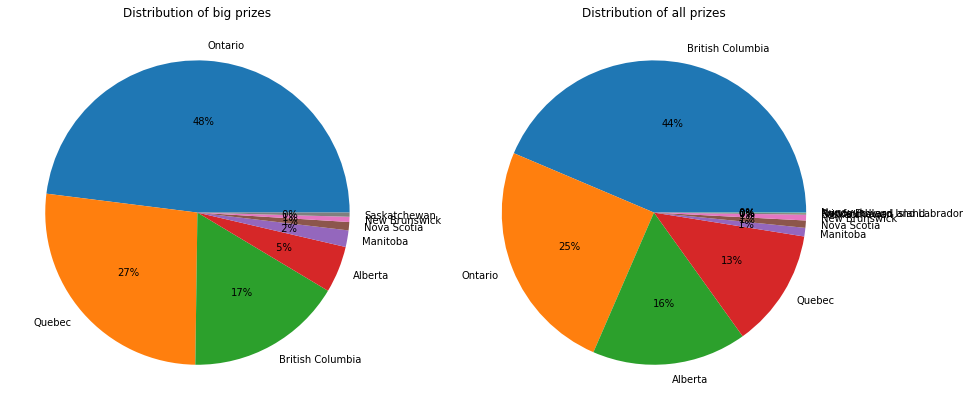

In [119]:
winner_list_province_big=winners_big.groupby(['province']).agg({'first':'count'}).sort_values(by='first',ascending=False)
winner_list_province_big.rename(columns={'first':'Num prizes'},inplace=True)
#winner_list_province.reset_index(inplace=True)
print(winner_list_province_big)

fig = plt.figure(figsize =(15, 10));

plt.subplot(1, 2, 1)
plt.pie(winner_list_province_big['Num prizes'],autopct='%2.0f%%',labels=winner_list_province_big.index);
plt.title('Distribution of big prizes')

plt.subplot(1, 2, 2)
plt.pie(winner_list_province['Num prizes'],autopct='%2.0f%%',labels=winner_list_province.index);
plt.title('Distribution of all prizes')

This pie chart aligns with the population distribution of Canda. Unlike the chart with all the winners, big winners are distributed according to the population distribution. What could be the reason for this?

**One explanation would be that the big prizes are often awarded through general award contests (ie. the prizes are drawn at a later date when all the entries are collected). Thus in that case all the entries have an equal probability of winning. Smaller prizes (such as lattes, $5 gift cards etc) are often awarded through instant win contests. In these contests, the time you play the game have a large impact on the probabilty of winning. If you are playing at a time where nobody else plays, your chances of winnings will be very high. Based on the higher number of wins by western provinces, it can be deduced that late night time (probably after 12 PM EST where its only 9 PM in BC) may be the best time to play these contests. Since people in BC can play even later than that when whole east coast sleeps, they have better odds in instant win contests.**

Now lets see if there are lucky winners who have won multiple bigger prizes.


In [130]:
winner_list_big=winners_big.groupby(['first','last','city']).agg({'province':'count','prize':lambda x: ','.join(x)}).sort_values(by='province',ascending=False)
winner_list_big.rename(columns={'province':'Num prizes'},inplace=True)
print(winner_list_big)

                            Num prizes  \
first    last city                       
Vanessa  L.   Hamilton               2   
Huseyin  B.   Etobicoke              2   
Nicole   M.   Stoney Creek           2   
Soman    P.   Toronto                2   
Renato   S.   Calgary                2   
...                                ...   
Hon      L.   Vancouver              1   
Hossein  M.   Montreal               1   
IBRAHIM  P.   Georgetown             1   
Ibtissam I.   Laval                  1   
yuejie   Z.   kirkland               1   

                                                                        prize  
first    last city                                                             
Vanessa  L.   Hamilton      One (1) Bundle including a K-Slim Coffee Maker...  
Huseyin  B.   Etobicoke     One (1) pair of Samsung Galaxy Buds+,One (1) S...  
Nicole   M.   Stoney Creek  One (1) Sonos One speaker,One (1) PKG e-vouche...  
Soman    P.   Toronto       A one-time credit represe

In [131]:
winner_list_big.reset_index(inplace=True)
for i in range(10):
  temp=winner_list_big.iloc[i]['prize'].split(',')
  name=winner_list_big.iloc[i]['first']+" "+winner_list_big.iloc[i]['last']
  number_prizes=winner_list_big.iloc[i]['Num prizes']
  print(f'{name} has won {number_prizes} prizes')
  print(Counter(temp))

Vanessa L. has won 2 prizes
Counter({'One (1) Bundle including a K-Slim Coffee Maker': 1, ' a travel mug and 24 Van Houtte Original House Blend coffee pods': 1, 'One (1) Sonos One speaker': 1})
Huseyin B. has won 2 prizes
Counter({'One (1) pair of Samsung Galaxy Buds+': 1, 'One (1) Sonos One speaker': 1})
Nicole M. has won 2 prizes
Counter({'One (1) Sonos One speaker': 1, 'One (1) PKG e-voucher with a value of $200': 1})
Soman P. has won 2 prizes
Counter({'A one-time credit representing one year of Fido service\xa0': 1, 'One (1) Samsung Galaxy Watch Active2': 1})
Renato S. has won 2 prizes
Counter({'One (1) Samsung Galaxy Watch Active2': 1, 'One (1) TCL 20 Pro 5G smartphone': 1})
Thanh H. has won 2 prizes
Counter({'One (1) Sonos One speaker': 1, 'One (1) Éconofitness PLATINUM membership valued at approx. $311.74': 1})
Hugo M. has won 2 prizes
Counter({'One (1) PKG e-voucher with a value of $200': 1, 'One (1) Éconofitness PLATINUM membership valued at approx. $311.74': 1})
Martin F. has

There are several people who have won multiple big prizes. However most of them seem to be mid level prizes (not like winning 10k and another $500).

In [133]:
winners_big[winners_big['prize']=='One (1) virtual prepaid card of $2,500\xa0'].head()

,first,last,city,province,prize
19267,Akshita,P.,Montreal,Quebec,"One (1) virtual prepaid card of $2,500"


In [134]:
winner_list_first_big=winners_big.groupby(['first']).agg({'city':'count'}).sort_values(by='city',ascending=False)
winner_list_first_big.rename(columns={'city':'Num prizes'},inplace=True)
winner_list_first_big.reset_index(inplace=True)
print(winner_list_first_big.head(10))

     first  Num prizes
0     Mark           6
1  Michael           6
2    Chris           5
3   Robert           5
4    Colin           4
5    David           4
6    Diane           4
7  William           4
8    Aaron           3
9      Ray           3


The most common first names are similar for both our dataframes. Nothing special is going on here.

#Conclusion

Here we looked at the winners list from the scraped data from the Fido Xtra website. We extracted the first name, last initial, city, province, and the prize for all winnings. We found out that the total prize distribution is skewed towards BC and Alberta (the western provinces) although their population is lower than Ontario and Quebec. Then we looked at the distribution of bigger prizes (loosely defined as prizes worth more than $200). But this distriubtion aligns well with the general population distirbution of Canada and significantly different than the previuos distribution. We can conclude people in Western provinces have an added advantage when it comes to instant win contests due to their time zone.